In [1]:
#Loading packages and libraries


import matplotlib.pyplot as plt #for plotting functions
import librosa                  #for using features
import librosa.display          #for plotting sounds as waveforms
import IPython.display as ipd   #just for hearing the audio
import numpy as np              #for doing numerical computations

In [2]:
#Loading audio files

Imperial_file = "ImperialMarch60.wav"
Cantina_file = "CantinaBand60.wav"
Elephant_file = "BabyElephantWalk60.wav"

In [3]:
#Loading audio files as waveforms with a sample rate of 22050 hz, so we take 22050 samples per second

Imperial,sr = librosa.load(Imperial_file)
Cantina,sr = librosa.load(Cantina_file)
Elephant,sr = librosa.load(Elephant_file)

In [4]:
#Defining typical values fo the frame length and the hop length

FRAME_LENGTH=1024
HOP_LENGTH=512


In [5]:
#Checking the shape of our audio signal. We expect 60*22050=1323000 values, since we have a sample rate of 22050 and a duration of 60 seconds

Elephant.shape

(1323000,)

In [6]:
#Listen to one of our audio files

ipd.Audio(Imperial_file)

In [7]:
#Computing the RMS-Energy of each frame

rms_Elephant=librosa.feature.rms(Elephant,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0] #the [0] is just of dimesions-reasons for the plot
rms_Imperial=librosa.feature.rms(Imperial,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
rms_Cantina=librosa.feature.rms(Cantina,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]

In [8]:
#Using frames_to_time to convert our x-axis to time. We do not want to get  the frames on the x-axis

frames=(range(len(rms_Elephant))) 
t=librosa.frames_to_time(frames,hop_length=HOP_LENGTH)


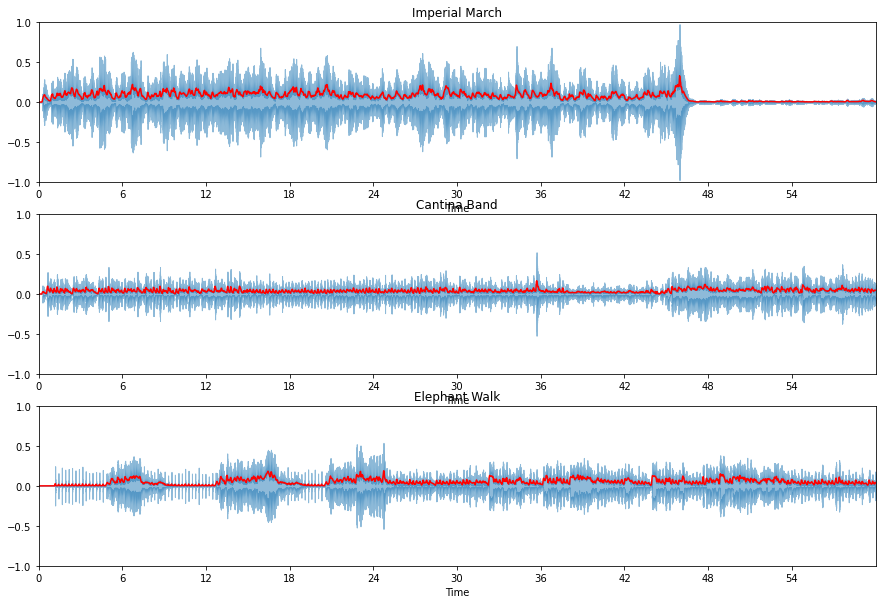

In [9]:
#Plotting our audion files as waveforms and plotting the RMS-Energy in red 

plt.figure(figsize=(15, 10))

plt.subplot(3,1,1)
librosa.display.waveplot(Imperial, alpha=0.5)
plt.plot(t,rms_Imperial,'r')
plt.ylim((-1,1))
plt.title('Imperial March')

plt.subplot(3,1,3)
librosa.display.waveplot(Elephant, alpha=0.5)
plt.plot(t,rms_Elephant,'r')
plt.ylim((-1,1))
plt.title('Elephant Walk')


plt.subplot(3,1,2)
librosa.display.waveplot(Cantina, alpha=0.5)
plt.plot(t,rms_Cantina,'r')
plt.ylim((-1,1))
plt.title('Cantina Band')



plt.show()

In [10]:
#Defining the RMS-Energy by our own. We do not need it, because we have librosa 
def rmse(signal,frame_length,hop_length):
    rmse=[]
    for i in range (0,len(signal),hop_length):
        rmse_current_frame=np.sqrt(sum(signal[i:i+frame_length]**2)/frame_length)
        rmse.append(rmse_current_frame)
    
    return np.array(rmse)
        
        
    

In [11]:
#Using our own Definition

rmse_Cantina=rmse(Cantina,FRAME_LENGTH,HOP_LENGTH)
rmse_Elephant=rmse(Elephant,FRAME_LENGTH,HOP_LENGTH)
rmse_Imperial=rmse(Imperial,FRAME_LENGTH,HOP_LENGTH)

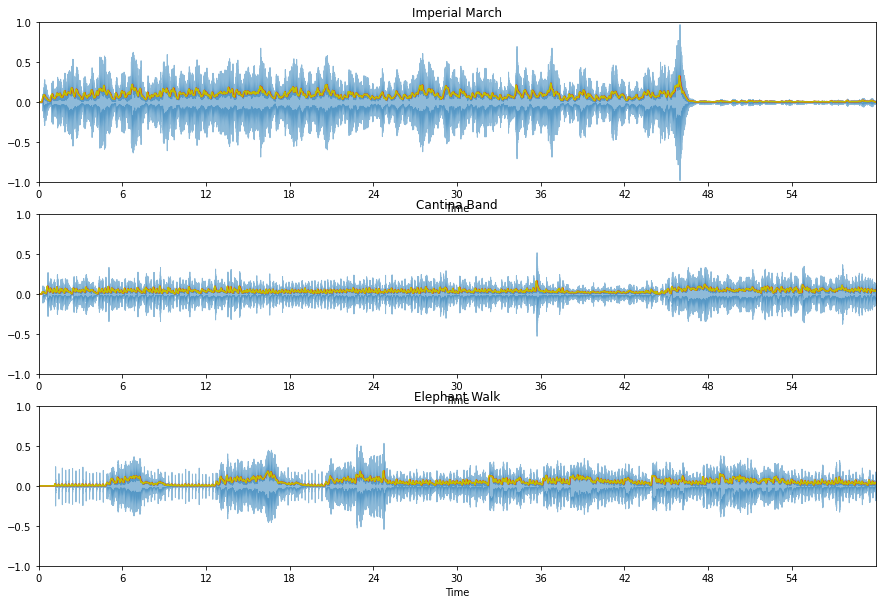

In [12]:
#Plotting with our own definition

plt.figure(figsize=(15, 10))

plt.subplot(3,1,1)
librosa.display.waveplot(Imperial, alpha=0.5)
plt.plot(t,rms_Imperial,'r')
plt.plot(t,rmse_Imperial,'y')
plt.ylim((-1,1))
plt.title('Imperial March')

plt.subplot(3,1,3)
librosa.display.waveplot(Elephant, alpha=0.5)
plt.plot(t,rms_Elephant,'r')
plt.plot(t,rmse_Elephant,'y')
plt.ylim((-1,1))
plt.title('Elephant Walk')


plt.subplot(3,1,2)
librosa.display.waveplot(Cantina, alpha=0.5)
plt.plot(t,rms_Cantina,'r')
plt.plot(t,rmse_Cantina,'y')
plt.ylim((-1,1))
plt.title('Cantina Band')



plt.show()

In [13]:
#Checking if our own defintion does the same like the librosa feature

np.all(rmse_Cantina==rms_Cantina) #I do not know why we get false

False

In [14]:
#Using librosa to compute the Zero Crossing Rate of each frame


zcr_Elephant=librosa.feature.zero_crossing_rate(Elephant,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
zcr_Imperial=librosa.feature.zero_crossing_rate(Imperial,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
zcr_Cantina=librosa.feature.zero_crossing_rate(Cantina,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]

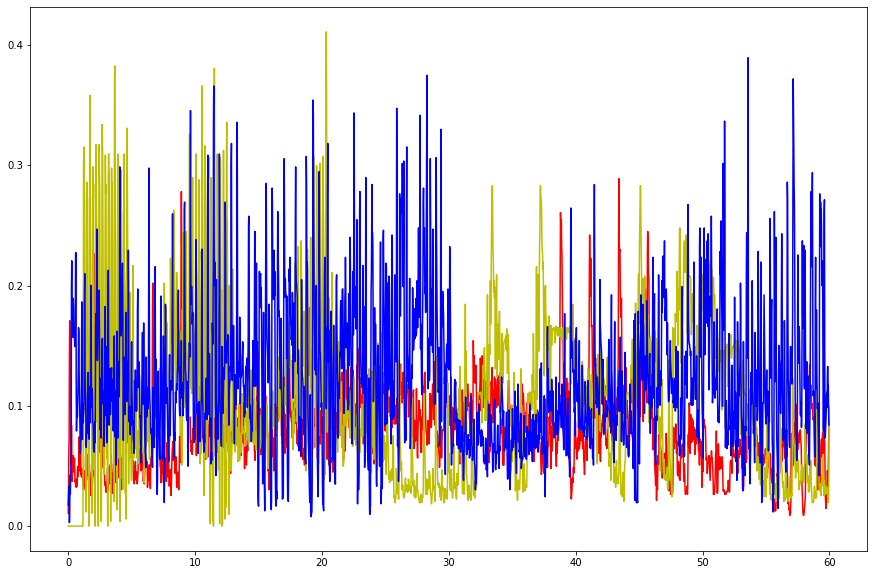

In [15]:
#Plotting the Zero Crossing rate with time as the x-axis

plt.figure(figsize=(15, 10))

plt.plot(t,zcr_Imperial,'r')
plt.plot(t,zcr_Elephant,'y')
plt.plot(t,zcr_Cantina, 'b')


plt.show()



In [16]:
zcr_Elephant.shape

#This is again the number of our frames

(2584,)